In [ ]:
#1.Housing Prices Prediction (Regression)

#libraries used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#load dataset
df = pd.read_csv("Bangalore.csv")  
df.head()


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [4]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
#Missing Values

df.isnull().sum()
df = df.dropna()

In [7]:
#Encode Categorical Features (Location )
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_White Field,Location_Whitefield,Location_Whitefield Hope Farm Junction,Location_Whitefield Road,Location_Yelahanka,Location_Yelahanka New Town,Location_Yerthiganahalli,Location_Yeshwantpur,Location_hebbal kempapura,Location_sarjapura attibele road
0,30000000,3340,4,0,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,7888000,1045,2,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,4866000,1179,2,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
3,8358000,1675,3,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,6845000,1670,3,0,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Split Features and Target

X = df_encoded.drop("Price", axis=1)   # target column name = Price
y = df_encoded["Price"]


In [10]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
#Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
#Predictions

y_pred = model.predict(X_test)


In [13]:
#Model Evaluation

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 5051176.336712671
MSE: 219810722830880.38
R2 Score: 0.18102415588449916


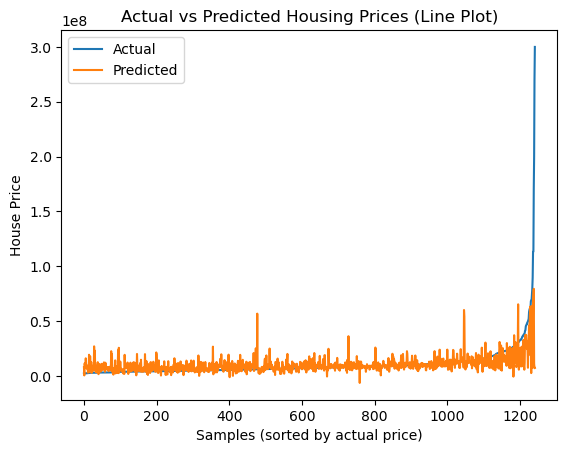

In [21]:
#Visualization (Actual vs Predicted Plot)

# Create comparison DataFrame
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Sort by actual values
comparison = comparison.sort_values(by="Actual").reset_index(drop=True)

# Line plot
plt.figure()
plt.plot(comparison["Actual"], label="Actual")
plt.plot(comparison["Predicted"], label="Predicted")
plt.xlabel("Samples (sorted by actual price)")
plt.ylabel("House Price")
plt.title("Actual vs Predicted Housing Prices (Line Plot)")
plt.legend()
plt.show()


In [ ]:
#2 .Email Spam Classification (Logistic Regression)

#Libraries used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
#load dataset
df = pd.read_csv("spam_assassin.csv")  
df.head()


,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [28]:
df.columns

Index(['text', 'target'], dtype='object')

In [29]:
df['target'].value_counts()


target
0    3900
1    1896
Name: count, dtype: int64

In [ ]:
# 
df = df[['text', 'target']]
df.head()


,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [31]:
#Encode Target Variable

df['target'] = df['target'].map({0: 0, 1: 1})


In [33]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['target'],
    test_size=0.2,
    random_state=42,
    stratify=df['target']
)


In [ ]:
#Text Vectorization (TF-IDF)

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [35]:
#Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
#Predictions

y_pred = model.predict(X_test_tfidf)

In [37]:
#Model Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9732758620689655

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       781
           1       0.99      0.93      0.96       379

    accuracy                           0.97      1160
   macro avg       0.98      0.96      0.97      1160
weighted avg       0.97      0.97      0.97      1160



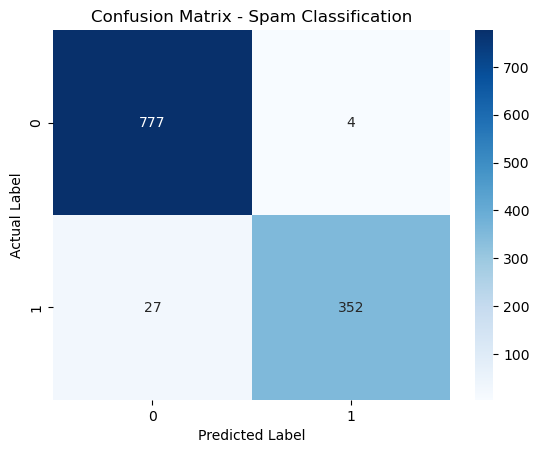

In [38]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Spam Classification")
plt.show()


In [39]:
#Test with a Custom Email
sample_email = ["Congratulations! You have won a free lottery. Click now to claim."]
sample_tfidf = vectorizer.transform(sample_email)
prediction = model.predict(sample_tfidf)

print("Spam" if prediction[0] == 1 else "Not Spam")


Spam
